
# Handling Files, Cameras, and GUIs



## Reading/writing an image file 
```python
import cv2
img = cv2.imread(path,flag)
```
### Read flags   
>    *   `cv2.IMREAD_COLOR = 1 `     : Loads the image in the BGR format (default).  
>    *   `cv2.IMREAD_GRAYSCALE = 0`  : Loads the image in grayscale.  
>    *   `cv2.IMREAD_UNCHANGED = -1 `: Loads the image as is, including the alpha channel if present and with original bits depth.  
>    *   `cv2.IMREAD_ANYCOLOR = 4`   : Loads the image in any color format.  
>    *   `cv2.IMREAD_ANYDEPTH = 2`   : Loads the image with any bit depth.  
>    *   `cv2.IMREAD_LOAD_GDAL = 8`  : Uses the GDAL driver to load the image, useful for geospatial data.  

### Notes  
1.   coridinates origin are in **top-left corner** , so image shape `shape =  (Height , Width ,.. ) `  
```python
height, width = arr.shape[:2]
# or where 1 if is gray 
h , w , c  = (*arr.shape,1)
```
<div style="text-align:center">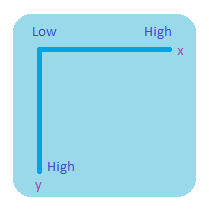</div>


2.   images files come in diffrent bite-depth , for clarity in colors purpose :  
     *   `8-bits intenger`  **np.uint8** : in 0..(2<sup>8</sup> -1)  
     *   `16-bits intenger`  **np.uint16** : in 0..(2<sup>16</sup> -1)  
     *   `32-bits intenger` **np.uint32** : in 0..(2<sup>32</sup> -1)  
     *   `16-bits floating point` :  **np.float16**  
     *   `32-bits floating point `  **np.float32** 

3. images files come in three categories  : 
    *   `gray scale ` : 1 pixel , 1 scalar value .  
    *   `RGB ` : ( b , g , r )  per pixel 
    *   `RGBA ` : ( b , g , r , a)  per pixel 
 
4.   images read by opencv `imread` the color channels are **BGR** .  

5. to get the original image format with any preprocessing from open cv  : 
```python
import cv2


if (unchanged := cv2.imread("float32bits.png" , -1)) is not None  : 
    print(f"Image depth = {unchanged.dtype} , shape = {unchanged.shape}")

```

## Accessing image data with numpy.array

### Display image using `matplotlib.pyplot` :   
```python
import matplotlib.pyplot as plt 
plt.axis('off')
plt.imshow(arr) # plt.imshow(gray , cmap = 'gray') to ensure gray 
plt.show()
```
### Accesing pixel or slice of pixels using numpy : 

#### Read single pixel
#### Get and set Crop :  
using `arr[row0:row1 , clo0:col1]`  
```python 
all_img = arr[:,:]
my_roi = arr[10:100,200:]
my_roi = [255,255,255]
```
#### Get and set Crop channel :  
using `arr[row0:row1 , clo0:col1 , index]`  
```python 
all_img = arr[:,:,0] # get array of channel B
# modify B channel to 0 of crop 
arr[10:100,200: , 1 ] = 120
```
### Generate image from `bytearray`
```python
import os  , cv2 
import numpy as np 

w , h ,channels = 200 , 300 , 4
# create array of random bytes
bytes_array = bytearray(os.urandom(w * h * channels ))

# convert array to numpy 
arr = np.array(bytes_array)
img = arr.reshape(w , h , channels)
```
## Reading/writing a video file 
### Reading a video file : 
to read video file use `cv2.videoCapture` , example : 

```python
import cv2
vid = cv2.VideoCapture('images/rick.mp4')
assert vid.isOpened()

while True: 
    success, frame = vid.read()
    if success : 
        print(frame)
    else : 
        break 
else : 
    vid.release()
```

### Writing a video file : 
to write video file use `cv2.videoCapture` , example : 

```python
import cv2
vid = cv2.VideoCapture('images/rick.mp4')
fps = vid.get(cv2.CAP_PROP_FPS)
frame_size = tuple(int(vid.get(prop)) for prop in [cv2.CAP_PROP_FRAME_WIDTH , cv2.CAP_PROP_FRAME_HEIGHT])
print(frame_size)
assert vid.isOpened()
w = cv2.VideoWriter("createdVedeo.avi" , cv2.VideoWriter_fourcc(*"I420"),fps , frame_size)

while True: 
    success, frame = vid.read()
    if success : 
        w.write(frame)
    else : 
        break 
else : 
    vid.release()
    w.release()
```
#### Write flags 
*   `cv2.VideoWriter_fourcc(*"I420")` : used for `.avi` file , uncompressed YUV encoding .
*   `cv2.VideoWriter_fourcc(*"PIM1")` : used for `.avi` file , MPEG-1 encoding .
*   `cv2.VideoWriter_fourcc(*"XVID")` : used for `.avi` file , MPEG-4 encoding .
*   `cv2.VideoWriter_fourcc(*"THEO")` : used for `.ogv` file , Ogg Vorbis encoding .
*   `cv2.VideoWriter_fourcc(*"FLV1")` : used for `.flv` file , Flash video encoding .

## Capturing camera frames : 
### Get Cameras devices available 
#### Get internal os devices 
```bash
ls /dev/video*
```
```console
~$ ls /dev/video*
/dev/video0  /dev/video1
```
to get all internal and external devices , install dependicy
```bash
sudo apt-get install v4l-utils
```
check devices  : 
```bash 
v4l2-ctl --list-devices
```
```console
~$ v4l2-ctl --list-devices
HD User Facing: HD User Facing (usb-0000:00:14.0-8):
	/dev/video0
	/dev/video1
	/dev/media0
```
### Reading camera frames 
to read from camera use `cv2.VideoCapture` and pass `deviceId` as argument , if you pass `0` it will take default  : 
```python
import cv2

camera = cv2.VideoCapture('/dev/video0')
assert camera.isOpened()

sizeframe = int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)) , int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT))

while camera.grab() : 
    frame = camera.retrieve()
    print(frame)


camera.release()
```


